<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/classifiaction_vec2text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Векторизация текста. Линейный классификатор


Необходимо провести классификацию бактерий. Есть два класса Опасны для человеки или Не опасн чел.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
df = pd.read_csv('bacteria_list_200.csv', delimiter = ';')

df.head(2)

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null    object
 3   Harmful to Humans  199 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [16]:
df['Harmful to Humans'] = df['Harmful to Humans'].str.replace('Yes', '1').str.replace('No', '0').str.replace(' 1', '1')
df['Harmful to Humans'].unique()

array(['1', '0'], dtype=object)

In [17]:
df['Harmful to Humans'] = df['Harmful to Humans'].astype('int')

Проведем векторизацию текста

In [18]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Name']).toarray()
X_train_counts.shape

(199, 352)

In [19]:
df_output_1 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_1)

199

In [20]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Family']).toarray()
X_train_counts.shape
df_output_2 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_2)

199

In [21]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Where Found']).toarray()
X_train_counts.shape
df_output_3 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_3)

199

In [22]:
X = pd.concat([df_output_1, df_output_2, df_output_3], axis=1)
len(X)

199

Разделим на тренировочную и тестовую выборки и проведем классификацию

In [23]:
Y = df['Harmful to Humans']
X = X

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=Y)

In [25]:
model = linear_model.RidgeClassifier(random_state=42)
model.fit(X_train, Y_train)

RidgeClassifier(random_state=42)

Confusion matrix, without normalization
[[18  3]
 [ 3 16]]


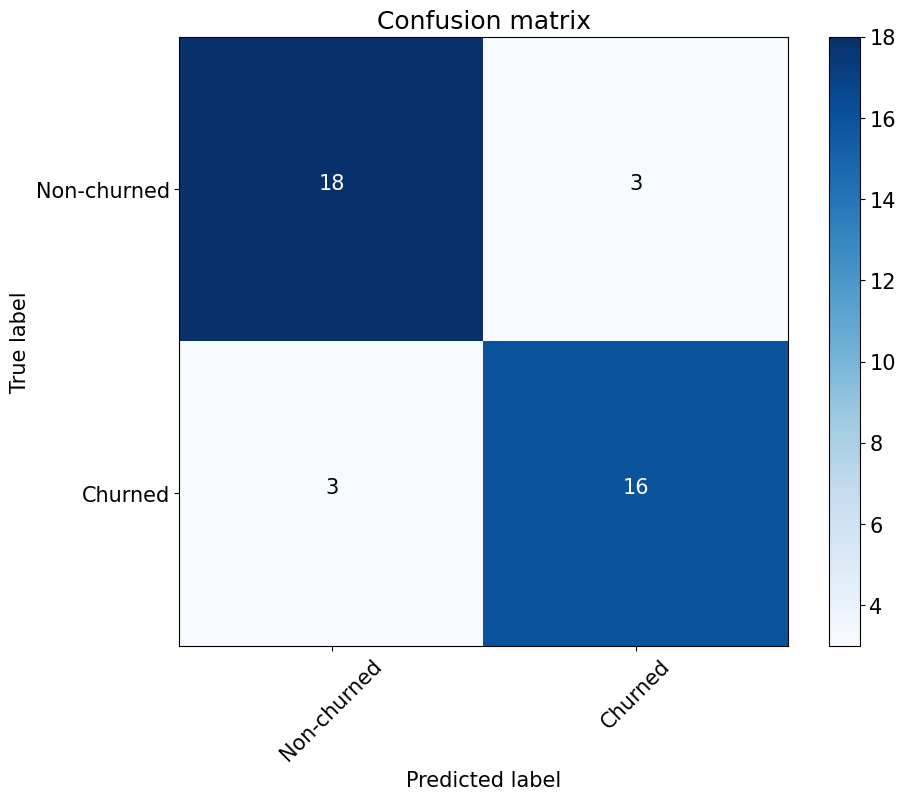

In [26]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [27]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        78

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [28]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.84      0.84      0.84        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



# Практика
выполняем классификацию данных https://www.kaggle.com/datasets/mexwell/stress-detection-from-social-media-articles


проверка через 20 мин

In [ ]:
USECOLS = ['title', 'body', 'Body_Title', 'label']

In [ ]:
df = pd.read_csv('/content/Reddit_Combi.csv', sep=';', usecols=USECOLS)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3123 non-null   object
 1   body        3113 non-null   object
 2   Body_Title  3123 non-null   object
 3   label       3123 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.7+ KB


In [ ]:
df.head(2)

,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1


# практика

закодировать текстовые столбцы https://www.kaggle.com/datasets/mexwell/dog-breeds-dogtime-dataset

In [ ]:
df = pd.read_csv('/content/breeds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   breed                               349 non-null    object
 1   url                                 349 non-null    object
 2   a_adaptability                      349 non-null    int64 
 3   a1_adapts_well_to_apartment_living  349 non-null    int64 
 4   a2_good_for_novice_owners           349 non-null    int64 
 5   a3_sensitivity_level                349 non-null    int64 
 6   a4_tolerates_being_alone            349 non-null    int64 
 7   a5_tolerates_cold_weather           349 non-null    int64 
 8   a6_tolerates_hot_weather            349 non-null    int64 
 9   b_all_around_friendliness           349 non-null    int64 
 10  b1_affectionate_with_family         349 non-null    int64 
 11  b2_incredibly_kid_friendly_dogs     349 non-null    int64 

In [ ]:
df['breed_group'].unique()

array(['Mixed Breed Dogs', 'Companion Dogs', 'Hound Dogs', 'Terrier Dogs',
       'Working Dogs', 'Sporting Dogs', 'Herding Dogs', 'Hybrid Dogs'],
      dtype=object)